In [6]:
import matplotlib.pyplot as plt

# Programming for Physics
<hr style="height: 2px; border-width: 0; color: gray; background-color: gray;" />

   &emsp;&emsp;&emsp;&emsp; __Lecture 12__ &mdash; simulation of motion along a line 
   

# Today's Plan

- Recap

- More physics examples

## Game to Physics
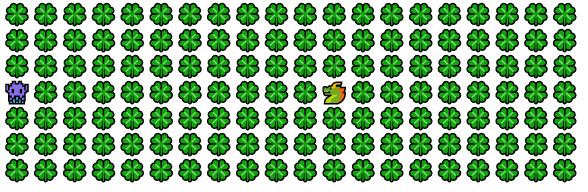

### 👾 $\rightarrow$ ⚽

🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀⚽🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀

# Soccer ball moving in grass

In [2]:
from IPython.display import clear_output
import time

In [3]:
pos=0 #initialize the position of the ball
field ="🍀"*20 #make a string variable of the field
fb=list(field) #change it to list so that we can put a ball in it
fb[pos]='⚽' # put the ball in the right position
fb=''.join(fb) #convert the list back to a string for printing
v=1 #the inital velocity
num_step=19 #maximum number of iteration
for i_step in range(num_step):
    print('position of the ball',pos)
    print('number of iteration',i_step+1,'/',num_step)
    pos=pos+v # update the position of the ball
   
    #printing the ball
    fb=list(field)
    fb[pos]='⚽'
    fb=''.join(fb)
    print('🧱'+fb+'🧱')
    clear_output(wait=True)
    time.sleep(0.1)

position of the ball 18
number of iteration 19 / 19
🧱🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀⚽🧱


In [4]:
pos=0 #initialize the position of the ball
field ="🍀"*20 #make a string variable of the field
fb=list(field) #change it to list so that we can put a ball in it
fb[pos]='⚽' # put the ball in the right position
fb=''.join(fb) #convert the list back to a string for printing
v=1 #the inital velocity
num_step=100 #maximum number of iteration
for i_step in range(num_step):
    print('position of the ball',pos)
    print('number of iteration',i_step+1,'/',num_step)
    pos=pos+v # update the position of the ball
    if pos==20: #if position reaches the right boundary
        v=-v #change velocity to -1, implementing bouncing back
        pos= 18
    if pos==-1: #if the position reaches the left boundary
        v=-v #change the velocity to 1
        pos=1
   
    #printing the ball
    fb=list(field)
    fb[pos]='⚽'
    fb=''.join(fb)
    print('🧱'+fb+'🧱')
    clear_output(wait=True)
    time.sleep(0.1)

position of the ball 15
number of iteration 100 / 100
🧱🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀🍀⚽🍀🍀🍀🍀🍀🧱


# motion along a straight line

How to describe a motion: kinematics

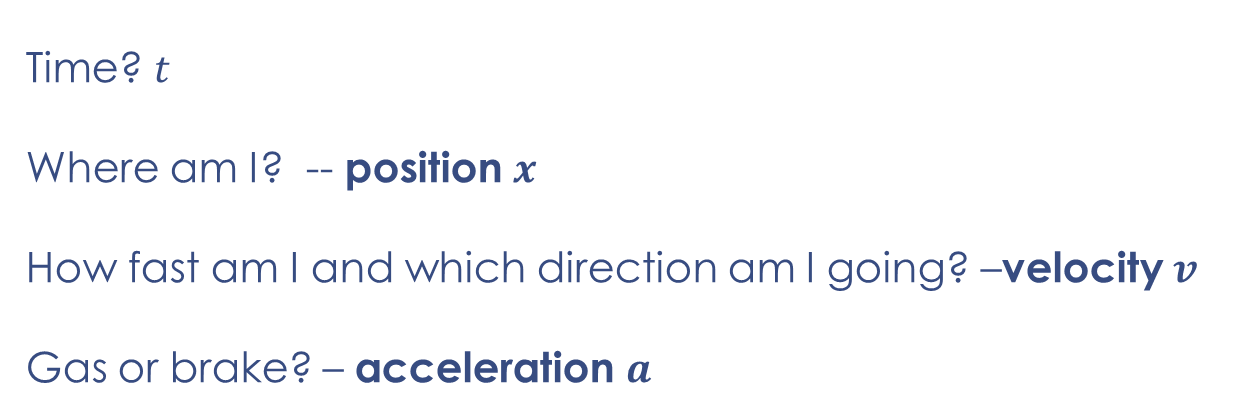


## Motion with constant velocity




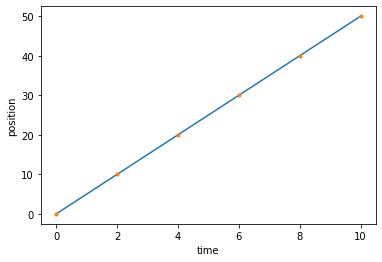
The time-graph of position: position as a function of time

The slope of the curve gives the velocity

In [7]:
import matplotlib.pyplot as plt #package for plotting
import numpy as np #package for array

[0, 2, 4, 6, 8, 10]
[0, 10, 20, 30, 40, 50]


Text(0, 0.5, 'position')

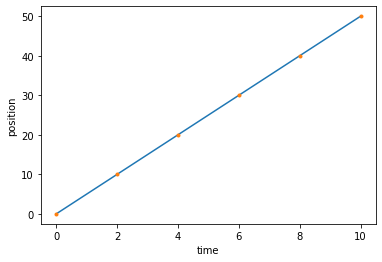

In [31]:
#method 1: using x=vt in a for loop
time_list=[0]
pos_list=[0]
num_step=5
dt=2
v=5
for i_step in range(1,num_step+1): #sequence 1, 2, 3, 4, 5
    t = dt*i_step #the time at i_step
    pos = v*t # the position at i_step
    time_list.append(t) #put the new time in the list
    pos_list.append(pos) #put the new position in the list
print(time_list)
print(pos_list)
plt.plot(time_list,pos_list)
plt.plot(time_list,pos_list,'.')
plt.xlabel('time')
plt.ylabel('position')

[ 0.  2.  4.  6.  8. 10.]
[ 0. 10. 20. 30. 40. 50.]


Text(0, 0.5, 'position')

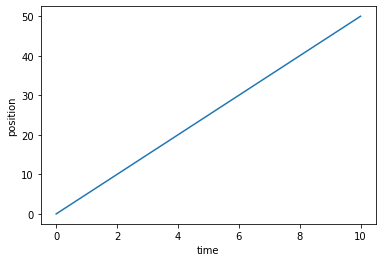

In [30]:
#method 2: using numpy array without using loops
num_step=5
dt=2.0
v=5.0
time_list=np.array(range(num_step+1))*dt #convert range(num_step) to an array, and multiply it by dt
pos_list=time_list*v #time_list is an array. Multiplying it by velocity is the position list
print(time_list)
print(pos_list)
plt.plot(time_list,pos_list)
plt.xlabel('time')
plt.ylabel('position')

### Another way to think about this motion




When you are driving, the position of the car in 1s only depend on the current position and velocity. 
This property is call __markovian__

### The key idea to use computer to simulate motion is to break down the continuous motion into discrete time steps with small time increment. This is also the idea behind calculus.

In other words, computer simulates motion __step by step__



Text(0, 0.5, 'position')

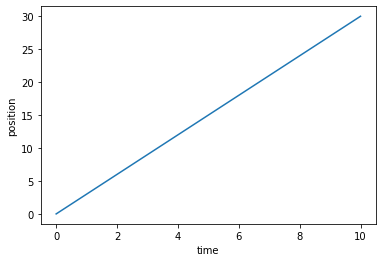

In [25]:
#method3: simulation step by step
pos=0.0
t=0.0
v=3.0
t_max=10
num_step=100
dt=t_max/num_step

time_list=[t]
pos_list=[pos] #intial values

for i_step in range(num_step):
    t=t+dt #updating the time from the last step
    pos=pos+v*dt  #updating the position from the last step
    time_list.append(t) #store the new time
    pos_list.append(pos)#store the new position
#print(time_list)
#print(pos_list)
plt.plot(time_list,pos_list)
plt.xlabel('time')
plt.ylabel('position')

## Bouncing between two walls

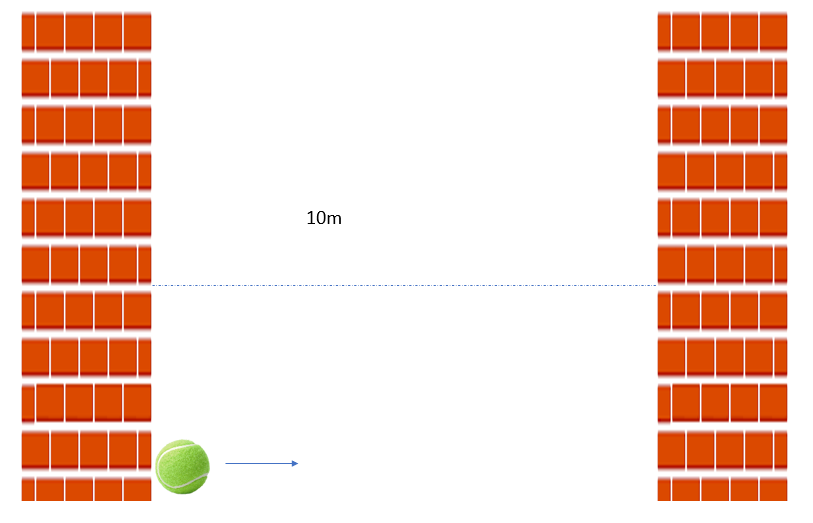

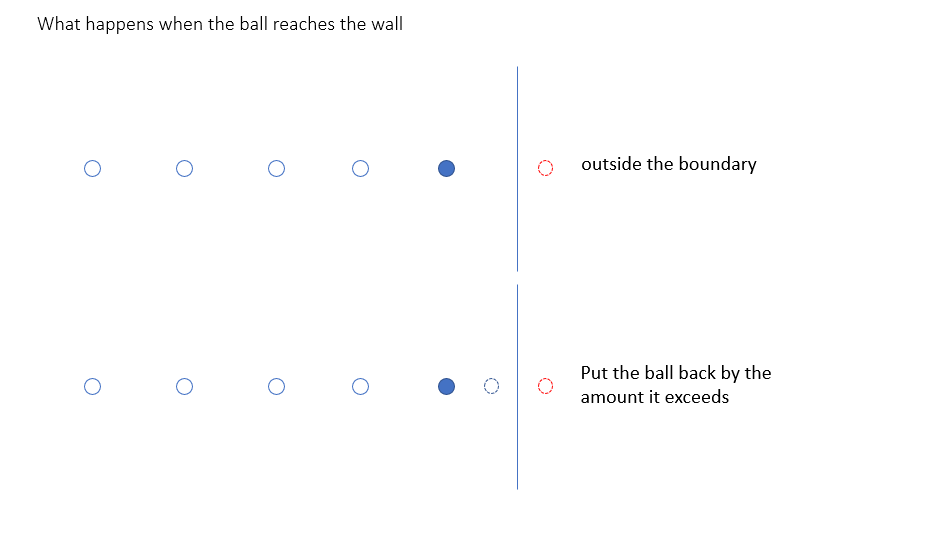

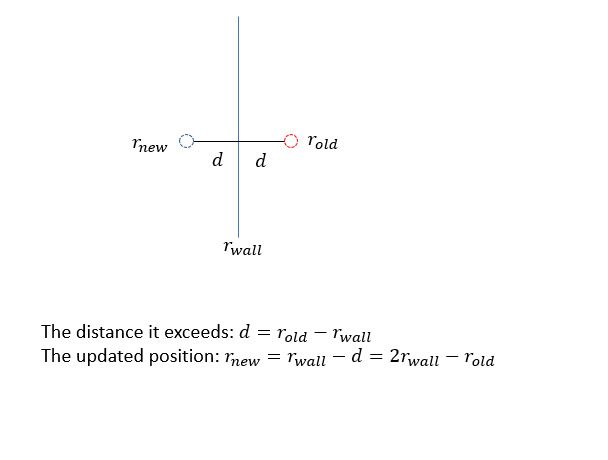

Text(0, 0.5, 'position')

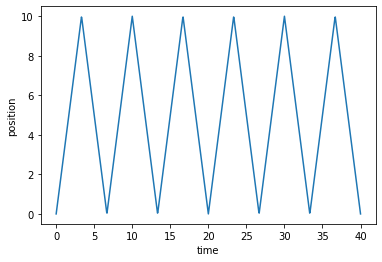

In [29]:
pos=0.0
t=0.0
v=3.0
t_max=40
num_step=1000
dt=t_max/num_step
length = 10

time_list=[pos]
pos_list=[t] #intial values

for i_step in range(num_step):
    t=t+dt #updating the time
    pos=pos+v*dt  #updating the position 
    
    if pos>length: #if the ball reaches the right wall
        v=-v # invert the velocity so the ball moves to the left
        r_wall=length
        pos=2*r_wall-pos #correct the position; 
        #think about why; if the new pos=11, it should actually be 9 =10 - (11 -10) due to reflection
    if pos<0:
        v=-v #invert the velocity so the ball moves to the right
        r_wall=0
        pos=2*r_wall-pos #correct the position and put the ball back into the physical range
    time_list.append(t) #store the new time
    pos_list.append(pos)#store the new position
#print(time_list)
#print(pos_list)
plt.plot(time_list,pos_list)
plt.xlabel('time')
plt.ylabel('position')


## Simulating Poll Table

simulating the motion in x and y direction independently

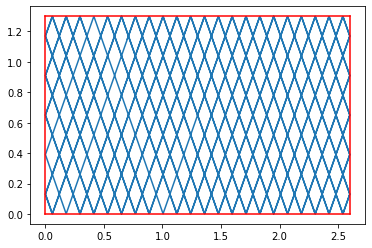

In [33]:
table_length = 2.6
table_width = 1.3

x = table_length/2  #initial x position
y = table_width/2  #initial y position 
#center of the table

pos_x = [x] # list of the position of the ball in the x direction, containing the inital value
pos_y = [y] # list of the position of the ball in the y direction, containing the intial value

t_max=100 #time step, 0.01 sec here
num_step =10000 #number of step, 100s in total
dt = t_max/num_step
v_x = 0.5 #inital velocity in the x direction
v_y = 1.1 #inital velocity in the y direction
t=0

for i_step in range(num_step):
    t = t + dt #update time
    x = x + v_x*dt #update x position
    y = y + v_y*dt #update y position
    if x > table_length: #if the ball goes out the right boundary
        v_x = - v_x
        x = table_length - (x -table_length)
    if x < 0: #if the ball goes out the left boundary
        v_x = - v_x
        x = -x 
    if y > table_width: #if the ball goes out the upper boundary
        v_y = -v_y
        y = table_width -(y - table_width)
    if y < 0: #if the ball goes out the lower boundary
        v_y = -v_y
        y = -y
    pos_x.append(x) #store new x to the list
    pos_y.append(y) #store new y to the list

plt.plot(pos_x,pos_y) #plot the trajectory of th ball
# plot the table
plt.plot([0,table_length],[0,0],'r') #lower boundary
plt.plot([0,table_length],[table_width,table_width],'r') #upper boundary
plt.plot([0,0],[0,table_width],'r') # left boundary
plt.plot([table_length,table_length],[0,table_width],'r') #right boundary

#play with different intial values!

## constant acceleration
$a=1m/s^2$


Text(0, 0.5, 'position')

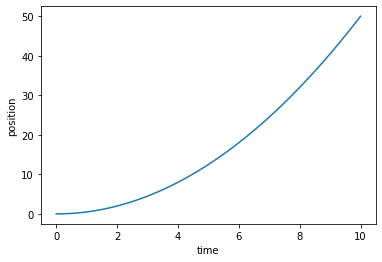

In [36]:

a =1.0
t_max=10
num_step=100
dt=t_max/num_step

time_list = np.array(range(num_step+1))*dt
v_list=time_list*a
pos_list= 0.5*a*time_list**2
plt.plot(time_list, pos_list)
plt.xlabel('time')
plt.ylabel('position')

## Motion with constant acceleration

__Can we develop a similar scheme to get $x_n$, $v_n$ from the previous step.__



\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t ?
\end{aligned}
\end{equation}
Although the velocity is increasing, during each time interval from step n to step n+1, the velocity does not change much as long as $\Delta t$ is small. Thefore we can approximate the motion in this small time interval as a motion of constant velocity. Thefore $x_{n+1}\approx x_n + v_{n+1}\Delta t$

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'position')

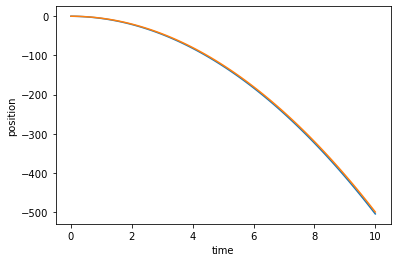

In [37]:
#free fall
t=0.0
v=0
a=-10
pos=0
time_list=[t]
pos_list=[pos]
t_max=10
num_step=100
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.plot(time_list, 0.5*np.array(time_list)**2*a) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')

Text(0, 0.5, 'position')

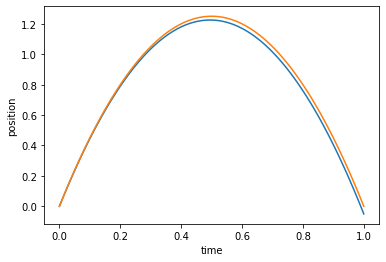

In [40]:
#with an initial velocity
t=0.0
v=5
a=-10
pos=0
time_list=[t]
pos_list=[pos]
t_max=1
num_step=100
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.plot(time_list, 5*np.array(time_list)+0.5*np.array(time_list)**2*a) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')

Text(0, 0.5, 'position')

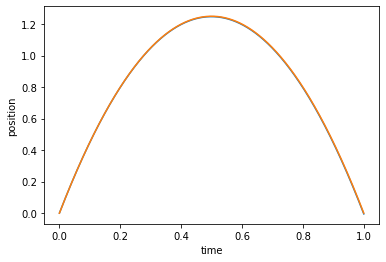

In [41]:
#with an initial velocity
#make dt smaller and keep the maximal time the same
t=0.0
v=5
a=-10
pos=0
time_list=[t]
pos_list=[pos]
t_max=1
num_step=1000
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.plot(time_list, 5*np.array(time_list)+0.5*np.array(time_list)**2*a) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')
# the agreement is better

Text(0, 0.5, 'position')

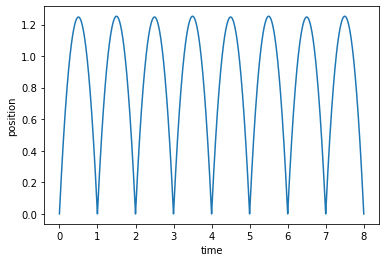

In [42]:
#the ball bounces back when hitting the floor
t=0.0
v=5
a=-10
pos=0.0
time_list=[t]
pos_list=[pos]
t_max=8
num_step=8000
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    if pos<0: #if ball hits floor, it bounces back
        v=-v
        pos=-pos
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.xlabel('time')
plt.ylabel('position')
# the agreement is better

# motion vith varying acceleration
In general the acceleration depends on the position


## Oscillator
### Hooke's Law
The force (F) needed to extend or compress a spring by some distance (x) scales linearly with respect to that distance.
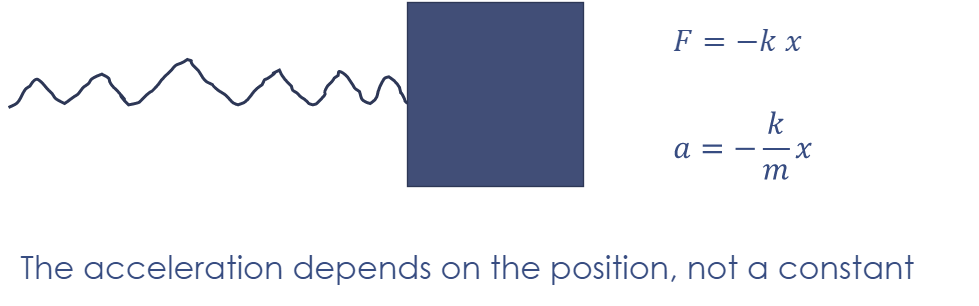
### Consider the following situation:
The block is moving right with a velocity 10 m/s. The coefficient $k/m = 1/s^2$.

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t \\
a_{n+1} &= -\frac{k}{m} x_{n+1}
\end{aligned}
\end{equation}
Although the velocity is changing, during each time interval from step n to step n+1, the velocity does not change much as long as $\Delta t$ is small. Therefore we can approximate the motion in this small time interval as a motion of constant velocity. Therefore $x_{n+1}\approx x_n + v_{n+1}\Delta t$

The acceleration depends on the position, therefore we need update the acceleration.

Text(0, 0.5, 'position')

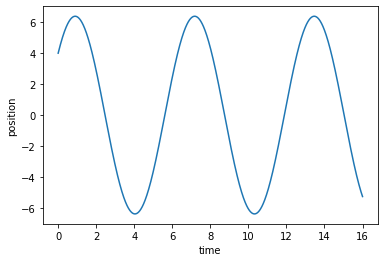

In [43]:
t=0.0
v=5
pos=4.0
time_list=[t]
pos_list=[pos]
t_max=16
num_step=1600
dt=t_max/num_step


for i_step in range(num_step):
    t=t+dt
    a=-1*pos #the acceleration now depends on the position
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
#plt.plot(time_list, 5*np.array(time_list)+0.5*np.array(time_list)**2*a) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')

__Laplace's demon__ (1814)


According to determinism, if someone (the demon) knows the precise location and momentum of every atom in the universe, their past and future values for any given time are entailed; they can be calculated from the laws of classical mechanics.

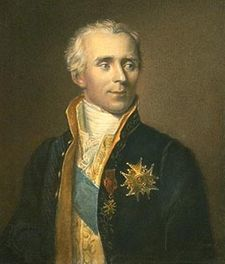

__Not entirely True__

1. too many atoms (~$10^{80}$) in the universe.
2. Chaos (Butterfly effect)

 - Can flapping of the wings of a butterfly cause a tornado in future?
(https://en.wikipedia.org/wiki/Butterfly_effect)
3. Quantum mechanics. 
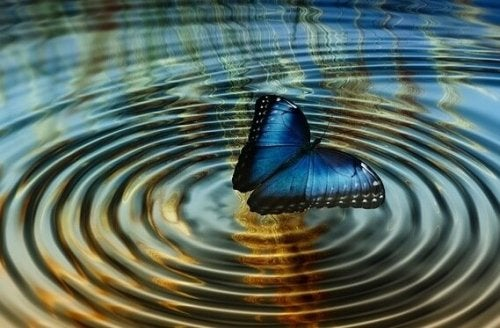

The Nobel Prize in Physics 2021 was awarded "for groundbreaking contributions to our understanding of __complex systems__" with one half jointly to Syukuro Manabe and Klaus Hasselmann "for the physical modelling of Earth's climate, quantifying variability and reliably predicting global warming" and the other half to Giorgio Parisi "for the discovery of the interplay of disorder and fluctuations in physical systems from atomic to planetary scales."